In [611]:
#Description: This program predicts if a pasenger will survive on the titanic.

In [612]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [613]:
df= pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [614]:
df.shape

(891, 12)

In this data set 891 rows and 11 columns.
PassengerId-Id of passenger
Survived-Give the informnation of survival 1 means survived and 0 means not survived.
Pclass- Passenger class 1st,2nd and 3rd
Name-Name of the passenger.
Sex-sex of the passenger M or F
Age-Age of the passenger
SibSp-siblings
Parch-parent and child
Ticket-Detail of ticket




# EDA

In [615]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 missing data in Age, 687 missing data in Cabin and 2 missing data in Embarked. too much missing data in cabin column.

<AxesSubplot:xlabel='Survived', ylabel='count'>

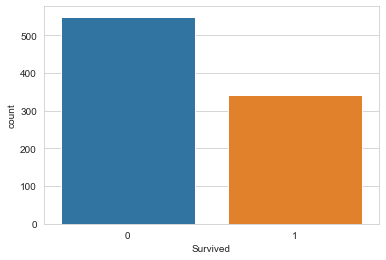

In [616]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

More than 550 people not survived,more than 300 people survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

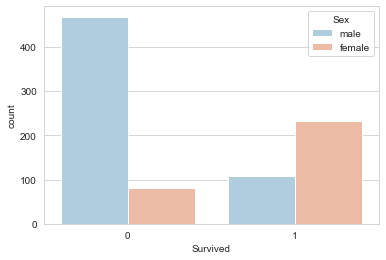

In [617]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

More than 400 male and less than 100 female did not survive,and more than 100 male and more than 200 female did survive.

<AxesSubplot:xlabel='Survived', ylabel='count'>

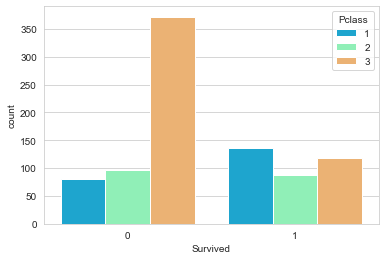

In [618]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

Not Survival rate of 3rd class passenger is more comapre to 1st and 2nd class, same Survival rate is more in 1st class compare to 2nd and 3rd class. 

<AxesSubplot:xlabel='Age'>

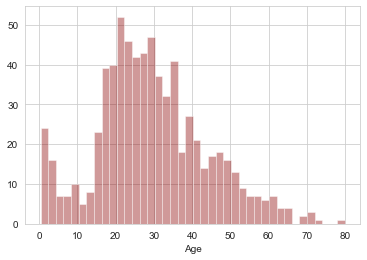

In [619]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

maximum no of people in the range of 20-40 age.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

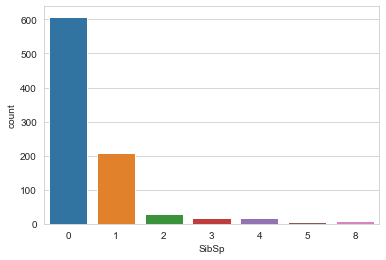

In [620]:
sns.countplot(x='SibSp',data=df)

more than 600 people had no sibling and spouse.

<AxesSubplot:>

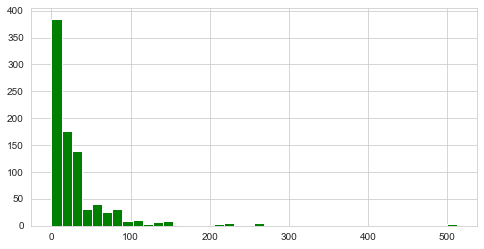

In [621]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

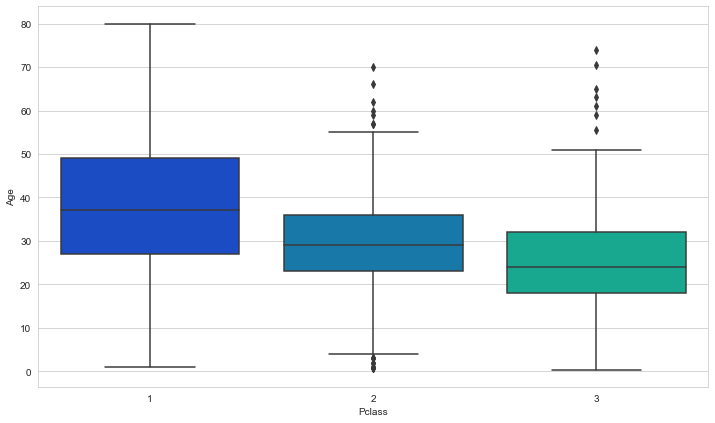

In [622]:
#Replace Null values in Age column.
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

Average age of 1st class passenger is 37.
Average Age of 2nd class passenger is 29.
Average Age of 3rd class passenger is 24.
we will replace nan value of age column by avarage age of passenger class cloumn.

In [623]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [624]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [625]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now there is no null values in Age column.

Now cabin has too much null vaules its 687, we can drop it.

In [626]:
df.drop('Cabin',axis=1,inplace=True)

In [627]:
df = df.dropna(subset=['Embarked'])

In [628]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [629]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [630]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [631]:
print(df['Sex'].unique())
print(df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [632]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()

df.iloc[:,4]= labelencoder.fit_transform(df.iloc[:,4].values)
df.iloc[:,10] = labelencoder.fit_transform(df.iloc[:,10].values)

In [633]:
print(df['Sex'].unique())
print(df['Embarked'].unique())

[1 0]
[2 0 1]


In [634]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int32
dtype: object

In [635]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

We made dummies of Sex and Embarked column.
no need of name and ticket column so we can drop these columns.

In [636]:
df=df.drop(['PassengerId'],axis=1)

PassengerId is just a serial number,we can drop this column.

In [637]:
#df = pd.concat([df,sex,embark],axis=1)

In [638]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [639]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [640]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


Our data is redy for our model.

In [641]:
df.shape

(889, 8)

In [642]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.019314,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,13.209814,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,36.500000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [643]:
dfcor = df.corr()
dfcor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.052051,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.405549,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.083730,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.052051,-0.405549,0.083730,1.000000,-0.242807,-0.170089,0.120938,-0.013385
SibSp,-0.034040,0.081656,-0.116348,-0.242807,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.170089,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.120938,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.013385,0.068900,0.040449,-0.226311,1.000000


<AxesSubplot:>

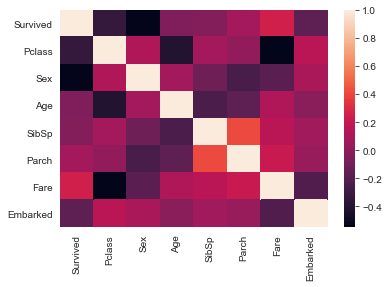

In [644]:
sns.heatmap(dfcor)

In [645]:
df.skew()

Survived    0.484568
Pclass     -0.636998
Sex        -0.625625
Age         0.546718
SibSp       3.691058
Parch       2.745160
Fare        4.801440
Embarked   -1.261367
dtype: float64

There are very skewed data.

In [646]:
sibsp_log = np.log(df['Parch'])
sibsp_log.skew()

nan

In [647]:
df.skew()

Survived    0.484568
Pclass     -0.636998
Sex        -0.625625
Age         0.546718
SibSp       3.691058
Parch       2.745160
Fare        4.801440
Embarked   -1.261367
dtype: float64

Survived       AxesSubplot(0.125,0.536818;0.110714x0.343182)
Pclass      AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Sex         AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Age         AxesSubplot(0.523571,0.536818;0.110714x0.343182)
SibSp       AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Parch       AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Fare              AxesSubplot(0.125,0.125;0.110714x0.343182)
Embarked       AxesSubplot(0.257857,0.125;0.110714x0.343182)
dtype: object

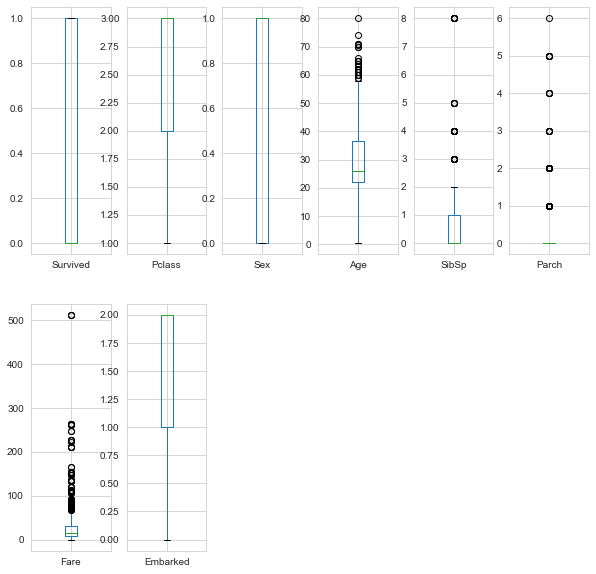

In [648]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

In [649]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.78696114, 0.82520863, 0.73534203, ..., 0.47432585, 0.50023975,
        0.58683958],
       [1.27071078, 1.57221121, 1.35991138, ..., 0.47432585, 0.78894661,
        1.93955453],
       [1.27071078, 0.82520863, 1.35991138, ..., 0.47432585, 0.48664993,
        0.58683958],
       ...,
       [0.78696114, 0.82520863, 1.35991138, ..., 2.00611934, 0.17408416,
        0.58683958],
       [1.27071078, 1.57221121, 0.73534203, ..., 0.47432585, 0.0422126 ,
        1.93955453],
       [0.78696114, 0.82520863, 0.73534203, ..., 0.47432585, 0.49017322,
        0.67635748]])

In [650]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  67,  70,  85,  87,  95, 115, 117,
       118, 158, 163, 166, 170, 179, 181, 200, 232, 257, 260, 265, 277,
       298, 310, 323, 340, 359, 376, 379, 385, 436, 437, 437, 479, 492,
       526, 540, 541, 556, 566, 609, 629, 637, 671, 677, 678, 682, 685,
       688, 699, 715, 729, 735, 736, 741, 744, 773, 778, 786, 791, 812,
       823, 844, 848, 849, 856, 861, 883], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [651]:
df_new=df[(z<3).all(axis=1)]

In [652]:
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,24.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [653]:
df.shape

(889, 8)

In [654]:
df_new.shape

(818, 8)

In [655]:
data_loss=((891-749)/891)*100
data_loss

15.937149270482603

Data loss is more so we will use old data set.

In [656]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [657]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [658]:
#split the data into x and y

In [659]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [660]:
from sklearn.model_selection import train_test_split

In [661]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [662]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [663]:
#create a function with many machine learning models
def models(x_train,y_train):
    
    #use Logistic Regression
    from sklearn.linear_model import LogisticRegression
    lg= LogisticRegression()
    lg.fit(x_train,y_train)
    
    #use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn =KNeighborsClassifier(n_neighbors=5,metric = 'minkowski',p=2)
    knn.fit(x_train,y_train)

    #use SVC(linear Kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear',random_state=0)
    svc_lin.fit(x_train,y_train)

    #use SVC(RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(x_train,y_train)

    #use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(x_train,y_train)

    #use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(x_train,y_train)

    #use the RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    rf= RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    rf.fit(x_train,y_train)
    
    #print the training accuracy for each model
    print('[0]LogisticRegression Accuracy:',lg.score(x_train,y_train))
    print('[1]KNeighbors Accuracy:',knn.score(x_train,y_train))
    print('[2]SVC Linear Accuracy:',svc_lin.score(x_train,y_train))
    print('[3]SVC RBF Accuracy:',svc_rbf.score(x_train,y_train))
    print('[4]Gaussian NB Accuracy:',gauss.score(x_train,y_train))
    print('[5]Decision Tree Accuracy:',tree.score(x_train,y_train))
    print('[6]Random Forest Accuracy:',rf.score(x_train,y_train))
    
    return lg,knn,svc_lin,svc_rbf,gauss,tree,rf

In [664]:
#Get and Train all of the models
model = models(x_train,y_train)

[0]LogisticRegression Accuracy: 0.8045007032348804
[1]KNeighbors Accuracy: 0.8677918424753868
[2]SVC Linear Accuracy: 0.7890295358649789
[3]SVC RBF Accuracy: 0.8424753867791842
[4]Gaussian NB Accuracy: 0.7974683544303798
[5]Decision Tree Accuracy: 0.9859353023909986
[6]Random Forest Accuracy: 0.9774964838255977


In [665]:
#Show the confusion matrix and accuracy for all the models on the test data
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm= confusion_matrix(y_test, model[i].predict(x_test))
    
    TN, FP,FN,TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
    
    test_score =(TP+TN)/(TP+TN+FN+FP)
    
    print(cm)
    print('model[{}] Testing Accuracy="{}"'.format(i,test_score))
    print()

[[93 16]
 [18 51]]
model[0] Testing Accuracy="0.8089887640449438"

[[85 24]
 [18 51]]
model[1] Testing Accuracy="0.7640449438202247"

[[91 18]
 [17 52]]
model[2] Testing Accuracy="0.8033707865168539"

[[97 12]
 [18 51]]
model[3] Testing Accuracy="0.8314606741573034"

[[89 20]
 [21 48]]
model[4] Testing Accuracy="0.7696629213483146"

[[88 21]
 [21 48]]
model[5] Testing Accuracy="0.7640449438202247"

[[94 15]
 [16 53]]
model[6] Testing Accuracy="0.8258426966292135"



In [666]:
from sklearn.model_selection import cross_val_score
lgscore = cross_val_score(lg,x,y,cv=5)
lgc=lgscore.mean()
print('Cross Val Score:',lgc*100)

Cross Val Score: 79.6419729575319


In [667]:
knnscore = cross_val_score(knn,x,y,cv=5)
knnc=knnscore.mean()
print('Cross Val Score:',knnc*100)

Cross Val Score: 69.51818701199771


In [668]:
svc_linscore = cross_val_score(svc_lin,x,y,cv=5)
svc_linc=svc_linscore.mean()
print('Cross Val Score:',svc_linc*100)

Cross Val Score: 78.73992255443407


In [669]:
svc_rbfscore = cross_val_score(svc_rbf,x,y,cv=5)
svc_rbfc=svc_rbfscore.mean()
print('Cross Val Score:',svc_rbfc*100)

Cross Val Score: 67.3808163524408


In [670]:
treescore = cross_val_score(tree,x,y,cv=5)
treec=treescore.mean()
print('Cross Val Score:',treec*100)

Cross Val Score: 78.17939440106646


In [671]:
gaussscore = cross_val_score(gauss,x,y,cv=5)
gaussc=gaussscore.mean()
print('Cross Val Score:',gaussc*100)

Cross Val Score: 78.85418650415794


We will take difference of cross_val_score and accuracy as per the least difference decide the model.Least difference get from SVC_linear.best model is SVC_linear.

# Hyper Parameter tuning

In [675]:
from sklearn.model_selection import GridSearchCV

In [679]:
parameter ={'max_depth':np.arange(2,10),
           'criterion':['gini','entropy'],
           'splitter':['best','random'],
           'max_features':['auto','sqrt','log2']}

In [687]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [688]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [689]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'splitter': 'best'}

In [672]:
#print the prediction of the SVC_linear
pred=model[2].predict(x_test)
print(pred)

print()

#print the actual values
print(y_test)

[0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1
 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1]

281    0
435    1
39     1
418    0
585    1
      ..
433    0
807    0
25     1
85     1
10     1
Name: Survived, Length: 178, dtype: int64


We are getting almost same result Predicted as well as Original.

In [673]:
import pickle
filename ='Titanic.pkl'
pickle.dump(svc_lin,open(filename,'wb'))

In [674]:
loaded_model = pickle.load(open('Titanic.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8033707865168539


The Accuracy is good.